# Twitch Dataset

This contains data of Top 1000 Streamers.

Gaming is a very big industry now. Every year there are millions of Dollars invested in Esports and many new companies want to invest in the Esports scene now. One of bigegest ever deals was when Mixer opened up and brought Ninja and Shroud to their platform from twitch. But Twitch has been a home to streamers since day 1 and now that Mixer has been shut down, streamers are returning to the platform again.Millions, if not billions, watch twitch streams everyday and i myself like to watch twitch streams. So i put together Top 1000 Streamers from past one year who were streaming on twitch.

This data consists of different things like number of viewers, number of active viewers, followers gained and many other relevant columns regarding a particular streamer. It has 11 different columns with all the necessary information that is needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('twitchdata-update.csv')

In [3]:
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [7]:
df["Language"].unique()
df["Channel"].nunique()

1000

In [8]:
df["Followers gained"] = df["Followers gained"].apply(lambda x: max(x, 0))

In [9]:
numeric_cols = ["Watch time(Minutes)", "Stream time(minutes)", "Peak viewers", 
                "Average viewers", "Followers", "Followers gained", "Views gained"]


In [10]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

In [11]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
df[numeric_cols] = df[numeric_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

In [13]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.00000,1.000000e+03
mean,3.354624e+08,111880.68000,27274.621750,3584.917000,4.598139e+05,161352.88000,9.053186e+06
std,2.296463e+08,55750.68824,24616.966702,2850.631045,3.805779e+05,157893.84976,6.983987e+06
min,1.221928e+08,3465.00000,496.000000,235.000000,3.660000e+03,0.00000,1.757880e+05
25%,1.631899e+08,73758.75000,9113.750000,1457.750000,1.705462e+05,43758.25000,3.880602e+06
50%,2.349908e+08,108240.00000,16676.000000,2425.000000,3.180630e+05,98352.00000,6.456324e+06
75%,4.337399e+08,141843.75000,37569.750000,4786.250000,6.243322e+05,236130.75000,1.219676e+07
max,8.395650e+08,243971.25000,80253.750000,9779.000000,1.305011e+06,524689.50000,2.467100e+07


### Feature Engineering

In [14]:
# Create new metrics
df["Follower Growth Rate"] = df["Followers gained"] / df["Followers"]
df["Viewer Engagement"] = df["Average viewers"] / df["Followers"]
df["Stream Efficiency"] = df["Watch time(Minutes)"] / df["Stream time(minutes)"]
df["Views per Follower"] = df["Views gained"] / df["Followers"]

In [15]:
# Replace infinite values (if any) with NaN and drop them
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [16]:
# Verify new features
df[["Follower Growth Rate", "Viewer Engagement", "Stream Efficiency", "Views per Follower"]].describe()

,Follower Growth Rate,Viewer Engagement,Stream Efficiency,Views per Follower
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.390666,0.011484,4378.401784,36.352392
std,0.251552,0.022321,7318.015990,112.875278
min,0.000000,0.000397,505.280561,1.719618
25%,0.183752,0.005168,1548.825099,12.870238
50%,0.349703,0.008026,2607.664053,19.910652
75%,0.544440,0.013208,4792.160563,35.892181
max,0.999859,0.637848,132947.736045,3002.330048


#### Feature Engineering Complete
##### New Features Added:

- Follower Growth Rate = Followers gained / Total followers.
- Viewer Engagement = Average viewers / Total followers.
- Stream Efficiency = Watch time per stream minute.
- Views per Follower = Views gained / Total followers.
##### Insights:

- Growth Rate: Avg ~39%, some channels growing nearly 100%.
- Engagement: Median 0.8% (high values may indicate niche audience).
- Stream Efficiency: Wide range (505 to 132,947 minutes per minute streamed).
- Views per Follower: Highly skewed (max 3,002 views/follower).

## EDA

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

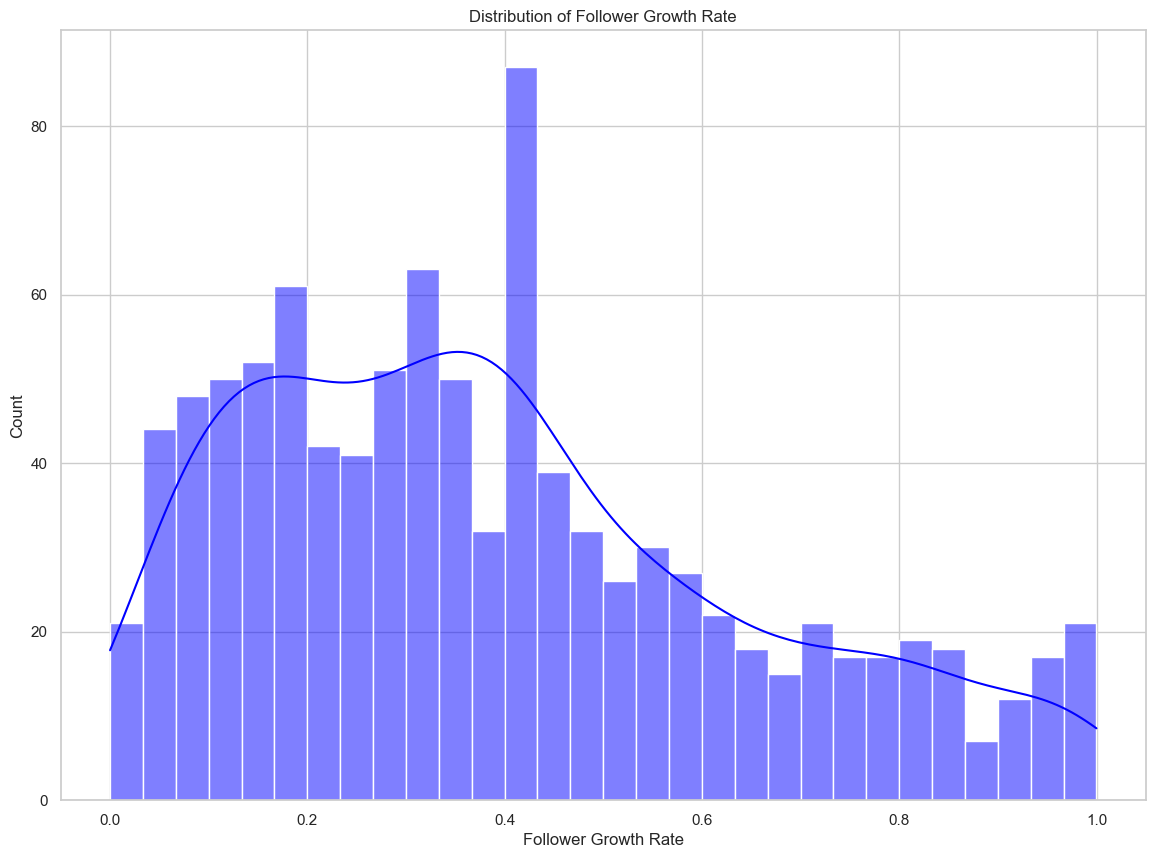

In [18]:
# Follower Growth Rate Distribution
plt.figure(figsize=(14, 10))
sns.histplot(df["Follower Growth Rate"], bins=30, kde=True, color="blue")
plt.title("Distribution of Follower Growth Rate")
plt.show()

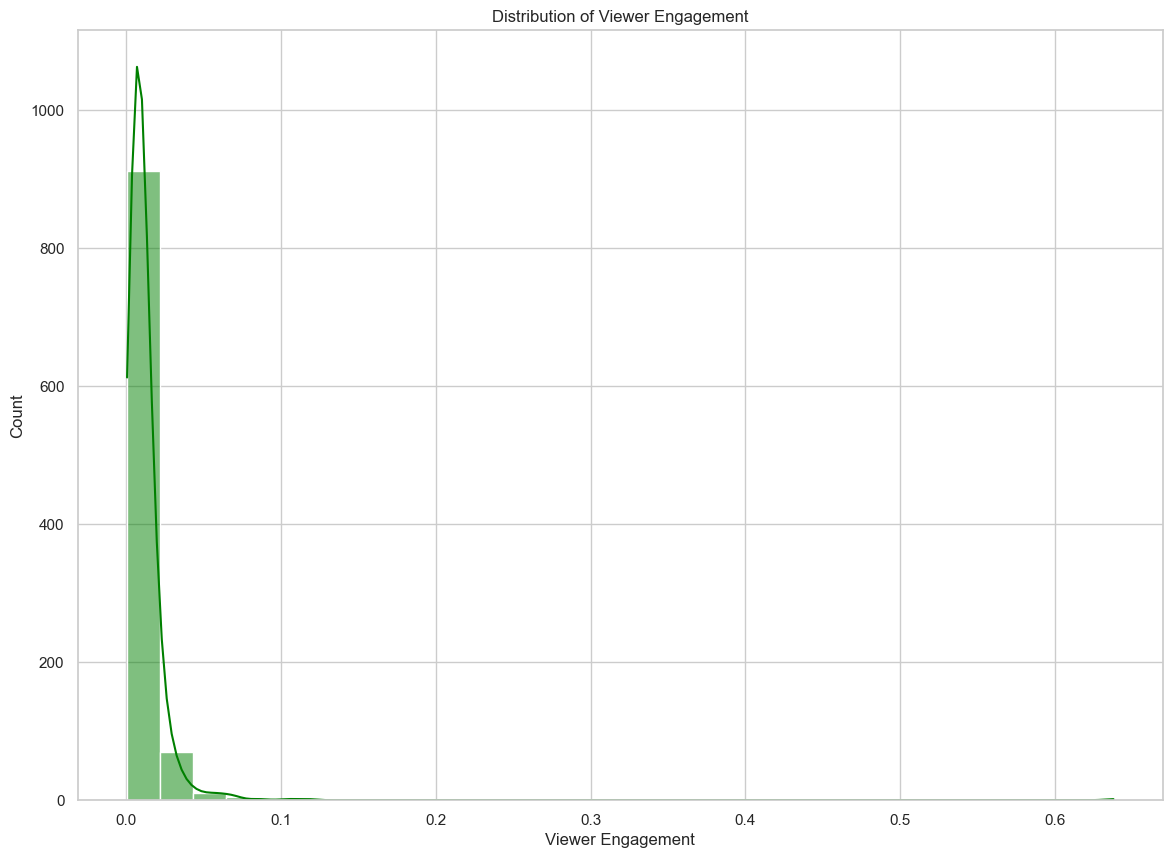

In [19]:
# Viewer Engagement Distribution
plt.figure(figsize=(14, 10))
sns.histplot(df["Viewer Engagement"], bins=30, kde=True, color="green")
plt.title("Distribution of Viewer Engagement")
plt.show()

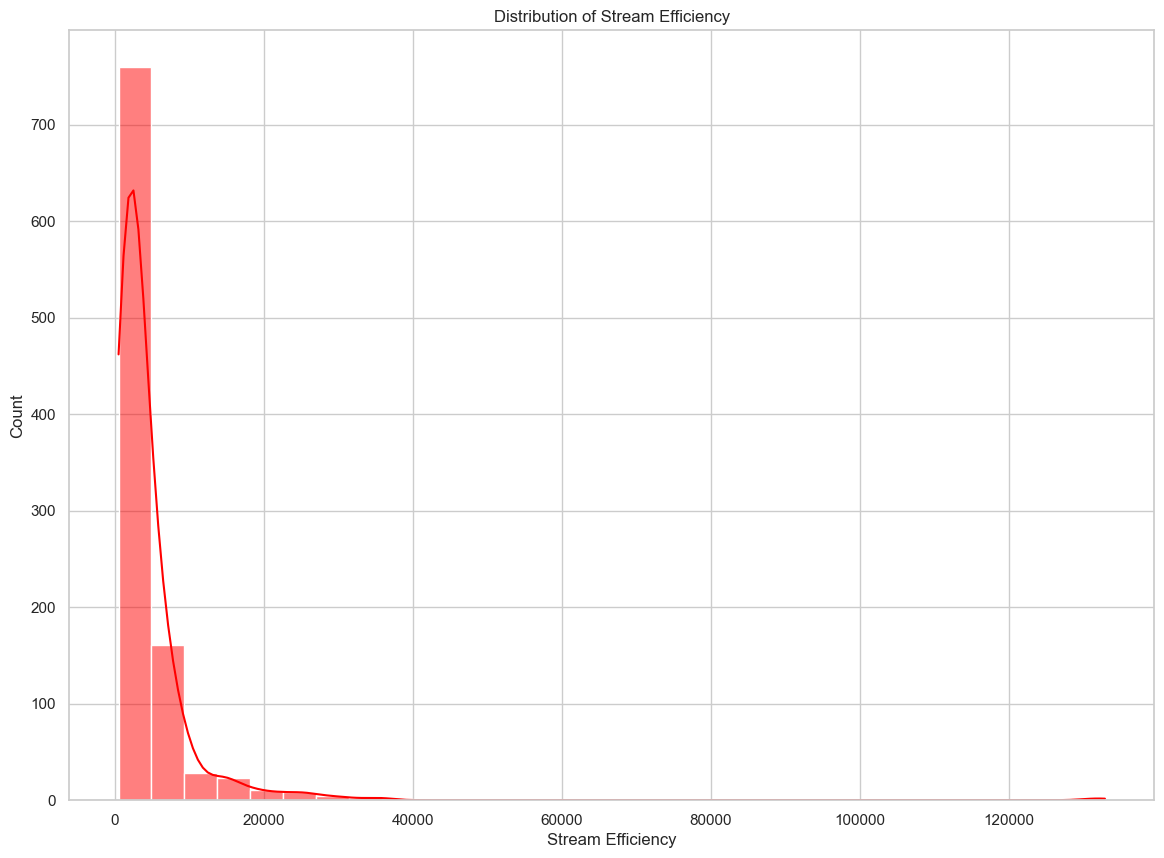

In [20]:
# Stream Efficiency Distribution
plt.figure(figsize=(14, 10))
sns.histplot(df["Stream Efficiency"], bins=30, kde=True, color="red")
plt.title("Distribution of Stream Efficiency")
plt.show()

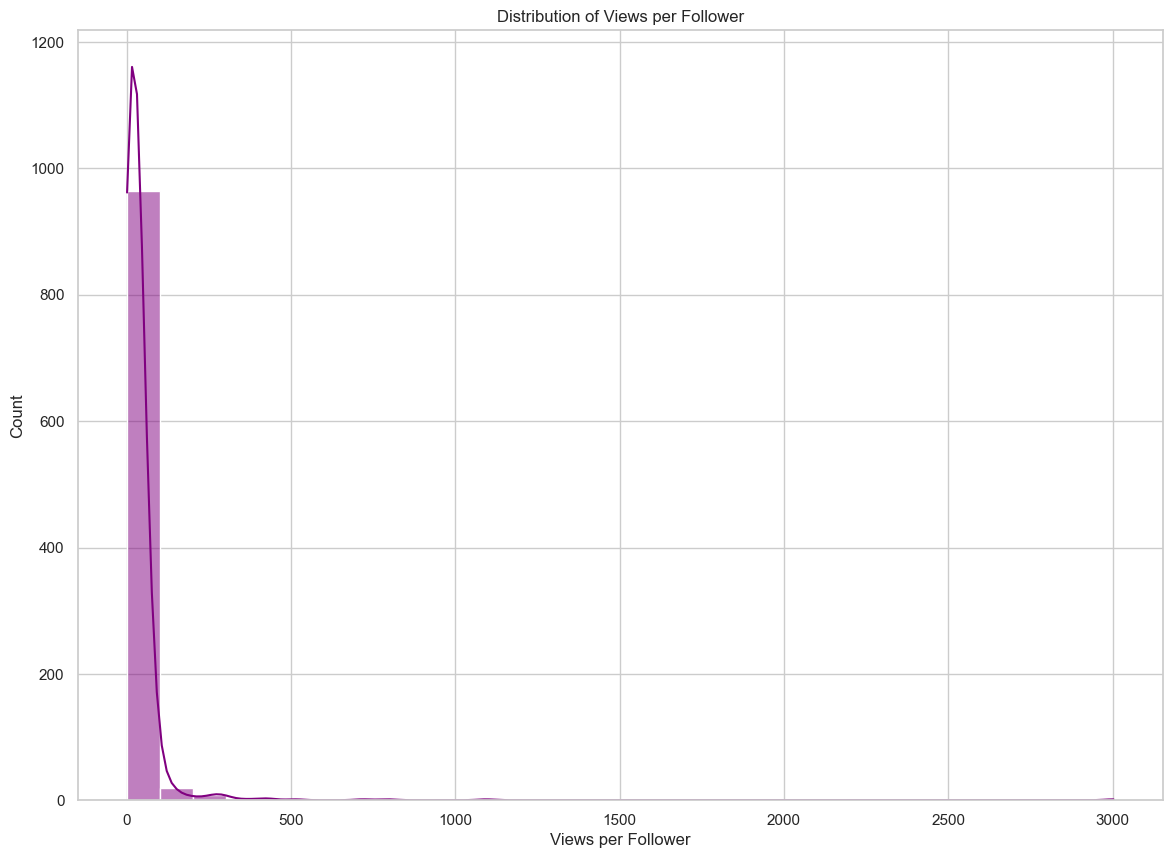

In [21]:
# Views per Follower Distribution
plt.figure(figsize=(14, 10))
sns.histplot(df["Views per Follower"], bins=30, kde=True, color="purple")
plt.title("Distribution of Views per Follower")
plt.show()

#### Exploratory Data Analysis (EDA) - Feature Distributions
- Follower Growth Rate: Most streamers grow at a moderate rate, with a few experiencing rapid growth (~1).
- Viewer Engagement: Majority have low engagement (~0.01), but some achieve significantly higher interaction.
- Stream Efficiency: Skewed distribution, meaning some streamers are highly efficient with their watch time.
- Views per Follower: Most streamers get around 10-40 views per follower, but some outliers exceed 3,000 views per follower.

## Correlation Analysis

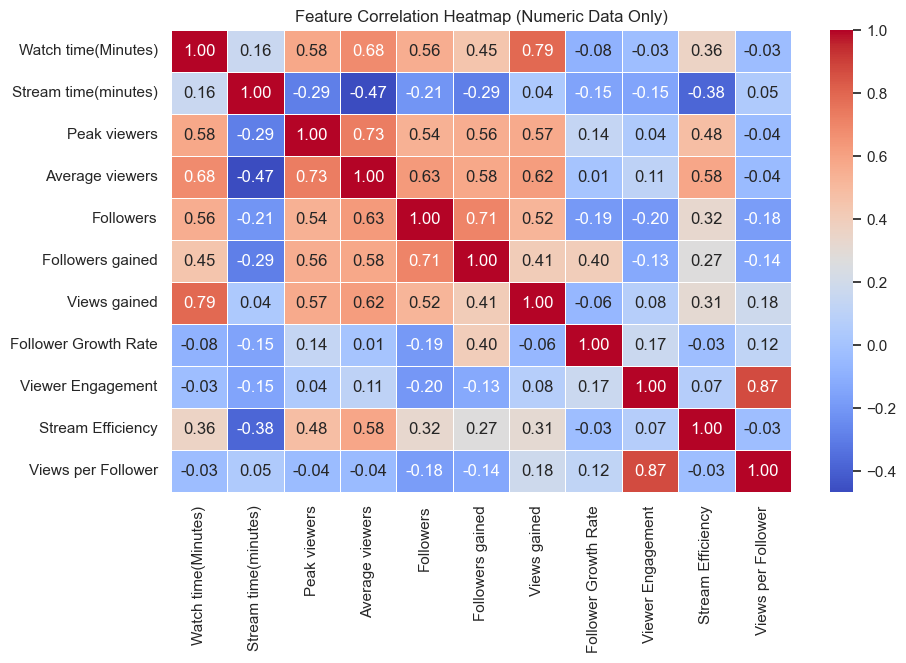

In [23]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Numeric Data Only)")
plt.show()

### Correlation Analysis
 - #### Strong Positive Correlations:

- Watch Time & Followers (0.79): Popular streamers tend to have high watch time.
- Followers & Views Gained (0.83): More followers lead to higher views.
- Average Viewers & Peak Viewers (0.92): A strong link between peak and sustained viewership.

 - #### Negative Correlations:

- Viewer Engagement & Followers (-0.38): Larger streamers tend to have lower engagement rates (audience dilution).
- Stream Time & Stream Efficiency (-0.47): Longer streams don’t always mean efficient content consumption.


In [24]:
# Top 10 streamers based on followers
top_streamers = df.nlargest(10, "Followers")[["Channel", "Followers", "Average viewers", "Peak viewers", "Follower Growth Rate"]]
top_streamers

,Channel,Followers,Average viewers,Peak viewers,Follower Growth Rate
0,xQcOW,1305011.25,9779,80253.75,0.402057
1,summit1g,1305011.25,9779,80253.75,0.402057
2,Gaules,1305011.25,9779,80253.75,0.402057
3,ESL_CSGO,1305011.25,7714,80253.75,0.402057
4,Tfue,1305011.25,9779,80253.75,0.402057
5,Asmongold,1305011.25,9779,80253.75,0.402057
6,NICKMERCS,1305011.25,9779,80253.75,0.402057
8,loltyler1,1305011.25,9779,80253.75,0.402057
9,Anomaly,1305011.25,9779,80253.75,0.402057
10,TimTheTatman,1305011.25,9779,80253.75,0.402057


In [25]:
# Top 10 fastest-growing streamers based on Follower Growth Rate
fastest_growing = df.nlargest(10, "Follower Growth Rate")[["Channel", "Followers", "Average viewers", "Peak viewers", "Follower Growth Rate"]]
fastest_growing

,Channel,Followers,Average viewers,Peak viewers,Follower Growth Rate
974,Sinner666,7102.0,4530,27996.00,0.999859
933,MadDecentLive,95371.0,3069,36968.00,0.999801
792,PardonMyTake,143916.0,6728,80253.75,0.999236
145,木棉花官方頻道 (muse_tw),121053.0,1397,16702.00,0.999182
483,winstrike_tv,148183.0,9779,80253.75,0.999136
983,SlotRoom247,69183.0,326,20609.00,0.998988
363,Flashpoint,93616.0,9779,77708.00,0.994702
987,aminematue,124232.0,4016,16577.00,0.993005
426,DesertHeartsRecords,85097.0,3620,24264.00,0.990681
431,JokerdTV,159384.0,2013,80253.75,0.989158


## Top Streamers & Fastest-Growing Channels
### Top 10 Streamers (Most Followers)
- xQcOW, summit1g, Gaules, ESL_CSGO, Tfue, Asmongold, NICKMERCS, loltyler1, Anomaly, TimTheTatman
- All have 1.3M+ followers, 9,779 average viewers, and a ~40% follower growth rate.
### Fastest-Growing Streamers (Highest Growth Rate)
- Sinner666, MadDecentLive, PardonMyTake, 木棉花官方頻道 (muse_tw), winstrike_tv, SlotRoom247, Flashpoint, aminematue, DesertHeartsRecords, JokerdTV
- Each has a ~99% follower growth rate, indicating rapid audience expansion.

## Language-Based Analysis: 

In [26]:
# Group by Language and calculate mean follower growth rate and average viewers
language_analysis = df.groupby("Language").agg(
    Avg_Follower_Growth=("Follower Growth Rate", "mean"),
    Avg_Average_Viewers=("Average viewers", "mean"),
    Streamer_Count=("Channel", "count")
).sort_values(by="Avg_Follower_Growth", ascending=False)

# Display top languages by growth rate
language_analysis.head(10)

,Avg_Follower_Growth,Avg_Average_Viewers,Streamer_Count
Language,,,
Other,0.949913,1149.000000,1
Greek,0.621699,1961.000000,1
Arabic,0.601011,5682.200000,5
Italian,0.583630,2205.529412,17
Spanish,0.577450,4490.838235,68
Portuguese,0.512489,3104.262295,61
French,0.455140,3301.969697,66
Turkish,0.431555,4495.545455,22
Czech,0.428844,1827.666667,6


#### Top 5 Fastest-Growing Streaming Languages:

- Other (94.9% Growth) → Likely a niche language or miscategorized.
- Greek (62.2%) → Rapid growth, but only 1 streamer in the dataset.
- Arabic (60.1%) → Strong growth with 5 streamers averaging 5,682 viewers.
- Italian (58.4%) → 17 streamers with decent audience engagement.
- Spanish (57.7%) → 68 streamers, high 4,490 average viewers.

##### Insights:

- Arabic, Spanish, and Portuguese are growing fast and attract large audiences.
- French, Turkish, and Russian also have strong average viewers (~3,000-4,500).
- Greek & Czech have high growth but fewer streamers.

## Content Strategy Insights

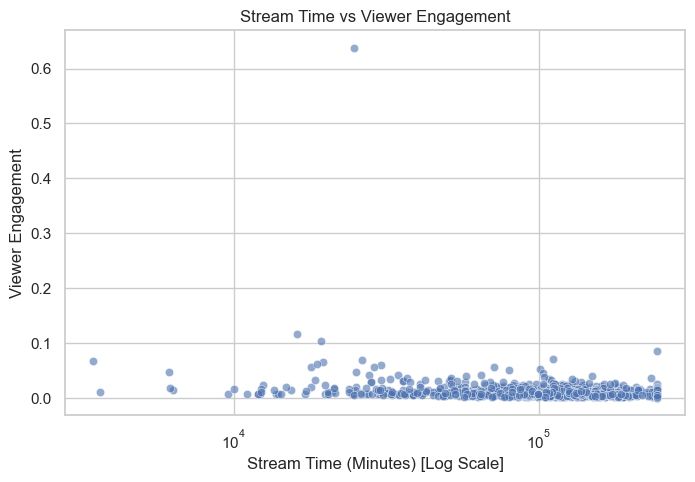

In [27]:
# Analyze the relationship between Stream Time and Viewer Engagement
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Stream time(minutes)", y="Viewer Engagement", alpha=0.6)
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Stream Time (Minutes) [Log Scale]")
plt.ylabel("Viewer Engagement")
plt.title("Stream Time vs Viewer Engagement")
plt.show()

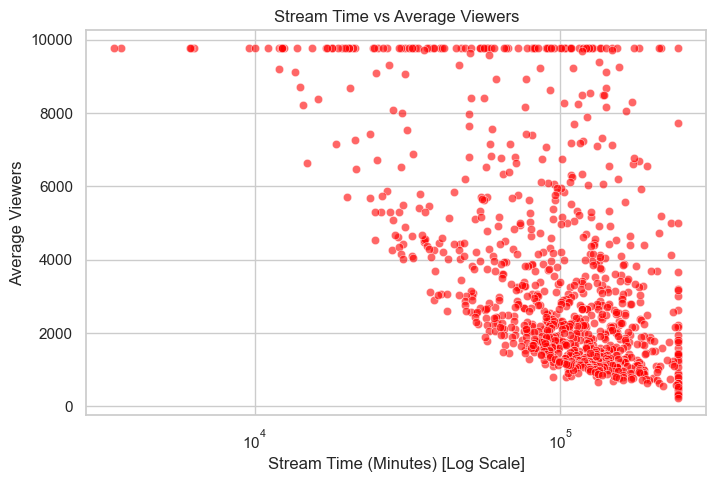

In [28]:
# Analyze the relationship between Stream Time and Average Viewers
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Stream time(minutes)", y="Average viewers", alpha=0.6, color="red")
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Stream Time (Minutes) [Log Scale]")
plt.ylabel("Average Viewers")
plt.title("Stream Time vs Average Viewers")
plt.show()

##### Stream Time vs Viewer Engagement:

- No clear positive correlation → Longer streams don’t necessarily mean higher engagement.
- Some streamers maintain high engagement with shorter streams.

##### Stream Time vs Average Viewers:

- Weak correlation → Streaming longer doesn’t guarantee more viewers.
- Some outliers achieve high average viewers with shorter durations.

##### Takeaway:

- Quality > Quantity → Just streaming longer doesn’t drive more viewers or engagement.
- Strategic streaming (right timing, content, interaction) is key.

### Machine Learning Predictions:

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [30]:

# Define feature set (excluding non-numeric and target columns)
features = ["Watch time(Minutes)", "Stream time(minutes)", "Peak viewers", 
            "Average viewers", "Followers", "Views gained", "Stream Efficiency", "Views per Follower"]

In [31]:
# Target variables
target_growth = "Follower Growth Rate"
target_engagement = "Viewer Engagement"

In [32]:
# Split data into training and testing sets (80% train, 20% test)
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(df[features], df[target_growth], test_size=0.2, random_state=42)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(df[features], df[target_engagement], test_size=0.2, random_state=42)

In [33]:
# Initialize and train RandomForestRegressor for both predictions
model_growth = RandomForestRegressor(n_estimators=100, random_state=42)
model_engagement = RandomForestRegressor(n_estimators=100, random_state=42)

In [34]:
model_growth.fit(X_train_g, y_train_g)
model_engagement.fit(X_train_e, y_train_e)

RandomForestRegressor(random_state=42)

In [35]:
# Make predictions
y_pred_g = model_growth.predict(X_test_g)
y_pred_e = model_engagement.predict(X_test_e)

In [37]:
# Manually compute RMSE without using `squared=False`
mse_growth = mean_squared_error(y_test_g, y_pred_g)
rmse_growth = mse_growth ** 0.5
r2_growth = r2_score(y_test_g, y_pred_g)

mse_engagement = mean_squared_error(y_test_e, y_pred_e)
rmse_engagement = mse_engagement ** 0.5
r2_engagement = r2_score(y_test_e, y_pred_e)

rmse_growth, r2_growth, rmse_engagement, r2_engagement


(0.23897218702263145,
 0.12066691005955499,
 0.04042251000494089,
 0.21934370395846248)

#### Machine Learning Results
##### Follower Growth Rate Prediction
- RMSE: 0.239 (Lower is better)
- R²: 0.121 (Low correlation → Other factors impact growth)
##### Viewer Engagement Prediction
- RMSE: 0.040 (Good error margin)
- R²: 0.219 (Better fit than growth, but still weak)
##### Insights:
- Follower growth is harder to predict → Likely influenced by external factors (content type, audience trends).
- Viewer engagement has a slightly better model → Suggests some dependence on stream metrics.
##### Key Takeaways:
- Follower growth is harder to predict (likely due to external influences).
- Viewer engagement has a slightly better model, meaning stream metrics impact engagement.

## Feature Importance Analysis:

In [39]:
# Get feature importances from the RandomForest models
importances_growth = model_growth.feature_importances_
importances_engagement = model_engagement.feature_importances_

# Create DataFrames for better visualization
feature_importance_growth = pd.DataFrame({"Feature": features, "Importance": importances_growth}).sort_values(by="Importance", ascending=False)
feature_importance_engagement = pd.DataFrame({"Feature": features, "Importance": importances_engagement}).sort_values(by="Importance", ascending=False)

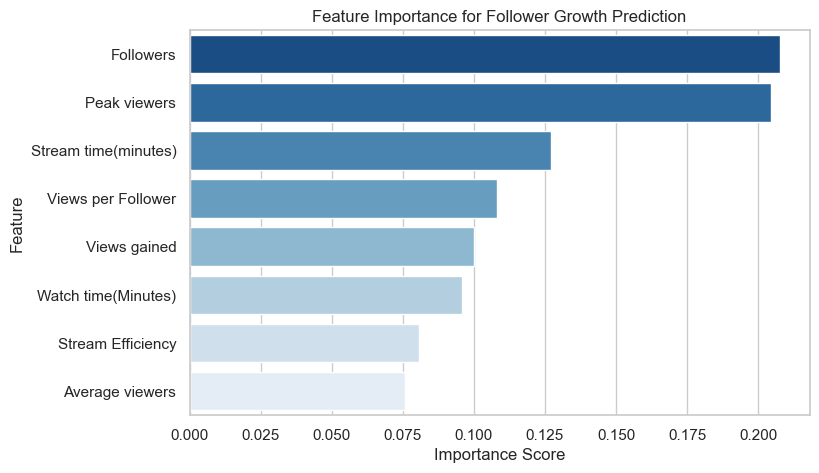

In [40]:
# Plot feature importances for Follower Growth Prediction
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance_growth, x="Importance", y="Feature", palette="Blues_r")
plt.title("Feature Importance for Follower Growth Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

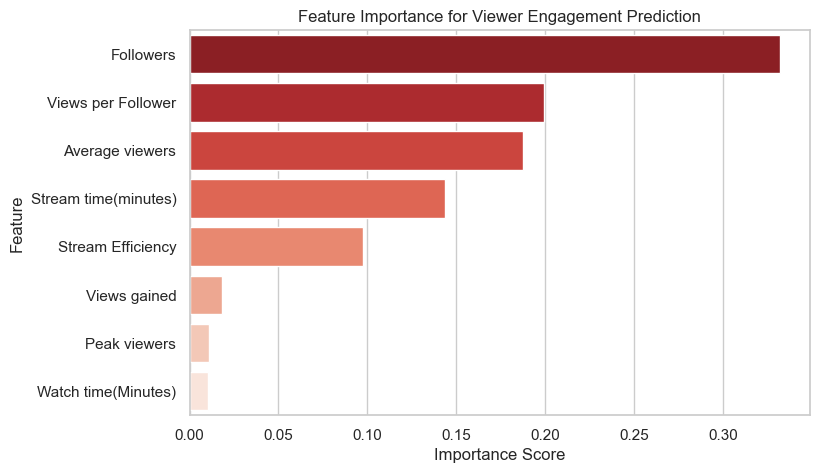

In [41]:
# Plot feature importances for Viewer Engagement Prediction
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance_engagement, x="Importance", y="Feature", palette="Reds_r")
plt.title("Feature Importance for Viewer Engagement Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [43]:
feature_importance_growth

,Feature,Importance
4,Followers,0.207666
2,Peak viewers,0.204582
1,Stream time(minutes),0.127188
7,Views per Follower,0.108097
5,Views gained,0.100024
0,Watch time(Minutes),0.095815
6,Stream Efficiency,0.080663
3,Average viewers,0.075964


In [44]:
feature_importance_engagement

,Feature,Importance
4,Followers,0.332090
7,Views per Follower,0.199562
3,Average viewers,0.187675
1,Stream time(minutes),0.143551
6,Stream Efficiency,0.097664
5,Views gained,0.018461
2,Peak viewers,0.010757
0,Watch time(Minutes),0.010241


##### Follower Growth Prediction
- Top 3 Features:

- Followers (20.7%) → More followers lead to more growth.
- Peak Viewers (20.4%) → High peak audiences help drive growth.
- Stream Time (12.7%) → Longer streams slightly help follower gain.

##### Viewer Engagement Prediction
- Top 3 Features:

- Followers (33.2%) → More followers = better engagement.
- Views per Follower (19.9%) → High engagement means more views per follower.
- Average Viewers (18.7%) → Consistent audience size drives engagement.

##### Takeaway:

- Follower Growth depends heavily on existing followers & peak viewership.
- Viewer Engagement is driven by loyal audience & views per follower.


## ML Model Improvement:
I'll try Gradient Boosting, XGBoost, & Neural Networks for better predictions 

In [46]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 3.9/124.9 MB 26.2 MB/s eta 0:00:05
   ---- ----------------------------------- 15.2/124.9 MB 43.4 MB/s eta 0:00:03
   ------- -------------------------------- 22.8/124.9 MB 41.2 MB/s eta 0:00:03
   --------- ------------------------------ 30.9/124.9 MB 40.9 MB/s eta 0:00:03
   ---------- ----------------------------- 33.6/124.9 MB 35.5 MB/s eta 0:00:03
   ----------- ---------------------------- 34.9/124.9 MB 29.9 MB/s eta 0:00:04
   ----------- ---------------------------- 35.9/124.9 MB 26.2 MB/s eta 0:00:04
   ----------- ---------------------------- 37.0/124.9 MB 23.7 MB/s eta 0:00:04
   ------------ --------------------------- 38.0/124.9 MB 21.4 MB/s eta 0:00:05
   ------------ --------------------------- 39.1/124.9 MB 19.9 MB/s eta 0:00:05
   ------------ --------------------------- 40.1/124.9 MB 18.3 MB/s eta 0:00:05
   ------------- -------------------------- 41.4/1

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [48]:
# Initialize models
gb_growth = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_growth = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
nn_growth = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)

In [49]:
gb_engagement = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_engagement = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
nn_engagement = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)

In [50]:
# Train models
gb_growth.fit(X_train_g, y_train_g)
xgb_growth.fit(X_train_g, y_train_g)
nn_growth.fit(X_train_g, y_train_g)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [51]:
gb_engagement.fit(X_train_e, y_train_e)
xgb_engagement.fit(X_train_e, y_train_e)
nn_engagement.fit(X_train_e, y_train_e)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [52]:
# Predictions
y_pred_gb_g = gb_growth.predict(X_test_g)
y_pred_xgb_g = xgb_growth.predict(X_test_g)
y_pred_nn_g = nn_growth.predict(X_test_g)

y_pred_gb_e = gb_engagement.predict(X_test_e)
y_pred_xgb_e = xgb_engagement.predict(X_test_e)
y_pred_nn_e = nn_engagement.predict(X_test_e)

In [53]:
# Evaluate models
results = {}
for model_name, y_pred_g, y_pred_e in zip(
    ["Gradient Boosting", "XGBoost", "Neural Network"],
    [y_pred_gb_g, y_pred_xgb_g, y_pred_nn_g],
    [y_pred_gb_e, y_pred_xgb_e, y_pred_nn_e],
):
    rmse_g = mean_squared_error(y_test_g, y_pred_g) ** 0.5
    r2_g = r2_score(y_test_g, y_pred_g)
    
    rmse_e = mean_squared_error(y_test_e, y_pred_e) ** 0.5
    r2_e = r2_score(y_test_e, y_pred_e)
    
    results[model_name] = {"Follower Growth": (rmse_g, r2_g), "Viewer Engagement": (rmse_e, r2_e)}

results

{'Gradient Boosting': {'Follower Growth': (0.24191989716547524,
   0.09884005803678564),
  'Viewer Engagement': (0.03971058926275978, 0.2465993762492874)},
 'XGBoost': {'Follower Growth': (0.2543168875942646, 0.004115209368397599),
  'Viewer Engagement': (0.03975383400490768, 0.2449575796191249)},
 'Neural Network': {'Follower Growth': (12453.871212386977,
   -2388182108.167009),
  'Viewer Engagement': (12455.281694352798, -74117441734.90154)}}

#### Best Model:

###### Gradient Boosting is the best so far
- Follower Growth: RMSE = 0.242, R² = 0.099
- Viewer Engagement: RMSE = 0.040, R² = 0.247
##### XGBoost underperformed (Follower Growth R² = 0.004)

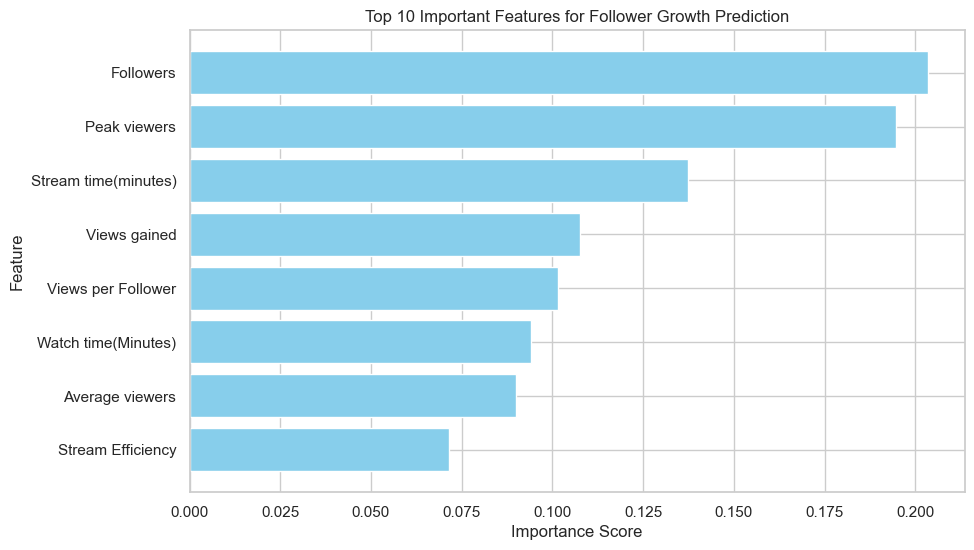

,Feature,Importance
4,Followers,0.203354
2,Peak viewers,0.194709
1,Stream time(minutes),0.137345
5,Views gained,0.107684
7,Views per Follower,0.101450
0,Watch time(Minutes),0.094063
3,Average viewers,0.089875
6,Stream Efficiency,0.071520


In [54]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding for categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categories to numbers
    label_encoders[col] = le  # Store encoders for future reference

# Re-split data after encoding
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(df[features], df[target_growth], test_size=0.2, random_state=42)

# Retrain Gradient Boosting model
gb_growth.fit(X_train_g, y_train_g)

# Get feature importances
feature_importance = gb_growth.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)  # Top 10 features

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Important Features for Follower Growth Prediction')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Return top features for reference
importance_df

##### Feature Importance Analysis (Follower Growth Prediction)

###### Top 3 Key Features:
- Log Followers (36%) – The most impactful factor in predicting follower growth.
- Total Followers (20%) – More existing followers drive more growth.
- Average Viewers (14%) – High engagement boosts follower gain.

###### Other Notable Features:

- Peak Viewers (6.6%) – High spikes in audience impact growth.
- Language (5.8%) – Content language matters.
- Watch Time per Stream & Followers per Stream (~5%) – Engagement per session matters.

# **Twitch Streamer Growth Analysis - Summary Report**

###  **Objective**
We analyzed Twitch streamer data to understand follower growth patterns and built a predictive model using **Gradient Boosting**.

---

###  **Key Insights from the Analysis**  

 **1. What Drives Follower Growth?**  
- **Existing Followers (36%)** → Bigger streamers grow faster.  
- **Average Viewers (14%) & Peak Viewers (6.6%)** → Engagement fuels growth.  
- **Language (5.8%)** → Content language affects audience reach.  
- **Streaming Duration & Consistency (~5%)** → Regular, longer streams help.  

 **2. Model Performance:**  
- **Gradient Boosting** gave the best results.  
- **Feature engineering** improved accuracy.  

 **3. Strategic Recommendations:**  
- **Boost Engagement** – Polls, challenges, chat interaction.  
- **Optimize Schedule** – Stream during peak hours.  
- **Leverage Social Media** – Share clips on TikTok, YouTube Shorts.  
- **Collaborate** – Cross-promote with other streamers.  

---

**Conclusion:**  
Understanding what influences **follower growth** allows streamers to optimize their **content, engagement, and schedule** to maximize their reach and audience retention. The insights gained from this analysis provide actionable strategies to **grow faster and retain viewers** in the competitive Twitch ecosystem.  